## Q1. Import the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

## Q2.import csv file Diwali Sales Data.csv

In [3]:
df = pd.read_csv('Diwali Sales Data.csv', encoding='latin-1')


## Q3. Find the shape of the data

In [4]:
df.shape

(11251, 15)

## Q4. Fetch the first five rows of the dataset

In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


## Q5. Get the complete info of the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


## Q6. Drop unrelated/blank columns 'Status' and 'unnamed1'

In [7]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


## Q7. Check for null values and find which columns have null values

In [8]:
df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


## Q8. Calculate the mean value of Age, Orders and Amount by using describe function

In [9]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


## Q9. Plot a bar chart for Gender and it's count

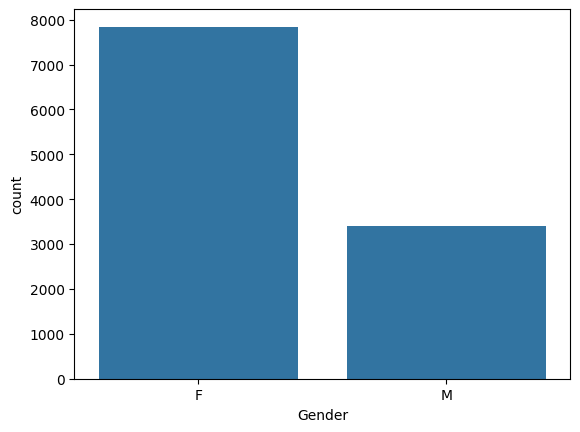

In [11]:

sns.countplot(x = 'Gender',data = df)

fig = px.bar(df, x='Gender', y='Age', color='Gender')
fig.show()


## Q10. Plot a bar chart for gender vs total amount

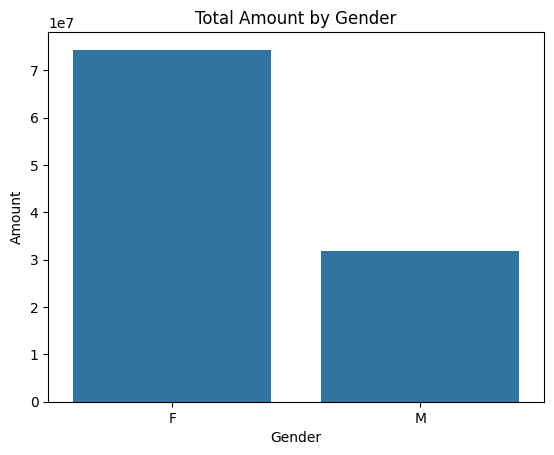

In [12]:
sales_gender = df.groupby('Gender')['Amount'].sum().reset_index()
sns.barplot(x='Gender', y='Amount', data=sales_gender)
plt.title('Total Amount by Gender')
plt.show()

## Q11. Plot the countplot for Age Group with hue and Gender

In [15]:
fig = px.histogram(df, x='Age Group', color='Gender', nbins=20)
fig.show()

## Q12. Draw the plot for total number of orders from top 10 states

In [24]:
top_10_states = df['State'].value_counts().head(10)
fig = px.bar(top_10_states, x=top_10_states.index, y=top_10_states.values)
fig.show()


## Q13.Draw the plot to plot total amount/sales from top 10 states

In [25]:
top_10_states = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10)
fig = px.bar(top_10_states, x=top_10_states.index, y=top_10_states.values)
fig.show()

## Q14. Draw the plot to show the marital status

In [26]:
marital_status_counts = df['Marital_Status'].value_counts().reset_index()
marital_status_counts.columns = ['Marital Status', 'Count']
fig = px.bar(marital_status_counts, x='Marital Status', y='Count', title='Distribution of Marital Status')
fig.show()

## Q15. Draw the plot to show the top 10 occupations

In [27]:
top_10_occupations = df['Occupation'].value_counts().head(10).reset_index()
top_10_occupations.columns = ['Occupation', 'Count']
fig = px.bar(top_10_occupations, x='Occupation', y='Count', title='Top 10 Occupations')
fig.show()

## Q16. Draw the countplot to print the top 10 categories

In [29]:
top_10_categories = df['Product_Category'].value_counts().head(10).reset_index()
top_10_categories.columns = ['Product_Category', 'Count']
fig = px.bar(top_10_categories, x='Product_Category', y='Count', title='Top 10 Product Categories')
fig.show()

## Q17. What is the prodct ID of the top 10 most sold products.

In [30]:
top_10_products = df.groupby('Product_ID')['Orders'].sum().sort_values(ascending=False).head(10).reset_index()
fig = px.bar(top_10_products, x='Product_ID', y='Orders', title='Top 10 Most Sold Products')
fig.show()


## Q18. What conclusion you can draw from the above visualizations.

***Conclusion***


---


Women, especially aged 26–35, are the top buyers.

Uttar Pradesh, Maharashtra, and Karnataka lead in both orders and revenue.

Married customers spend more than unmarried ones.

Top occupations: IT Sector, Healthcare, and Aviation.

Best-selling categories: Clothing, Food, and Electronics.

Top product: P00110142.